In [3]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
from qiskit.circuit.library import TwoLocal, EfficientSU2

import sys
sys.path.append('../../utility')
from vqe_run import *
from qc_ansatze import *

# lambda = 0.2

In [4]:
Hpauli =[('IIIIII', 6.15),
 ('IIIIIZ', -0.5),
 ('IIIIZI', -0.5),
 ('IIIZII', -0.5),
 ('IIZIII', -0.5),
 ('IXXIXX', -0.05),
 ('IZIIII', -0.5),
 ('XIXXIX', -0.05),
 ('XXIXXI', -0.05),
 ('ZIIIII', -0.5)]

from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms import NumPyEigensolver
H4q = SparsePauliOp.from_list(Hpauli)

# exactly diagonalize the system using numpy routines
solver = NumPyEigensolver(k=4)
exact_solution = solver.compute_eigenvalues(H4q)
print("Exact Result of qubit hamiltonian:", np.real(exact_solution.eigenvalues))
E_exact = np.round(np.real(exact_solution.eigenvalues)[0],5)
E_exact

Exact Result of qubit hamiltonian: [3.14807787 4.14674965 4.14674965 4.14674965]


3.14808

# TwoLocal circuit ansatze

In [5]:
ansatz_0a = TL_ansatz(H4q.num_qubits, 'ry', 'crx', "circular", 1)
ansatz_0b = TL_ansatz(H4q.num_qubits, 'rz', 'crx', 'circular', 1)
ansatz_0c = TL_ansatz(H4q.num_qubits, ['ry','rz'], 'crx', 'circular', 1)
ansatz_0d = TL_ansatz(H4q.num_qubits,['ry','y'], 'crx', 'circular', 1)

ansatz_1a =  TL_ansatz(H4q.num_qubits, 'ry', 'crx', "full", 1)
ansatz_1b =  TL_ansatz(H4q.num_qubits, 'rz', 'crx', "full", 1)
ansatz_1c =  TL_ansatz(H4q.num_qubits, ['ry','rz'], 'crx', "full", 1)
ansatz_1d =  TL_ansatz(H4q.num_qubits, ['ry','y'], 'crx', "full", 1)

Circuit ansatz with 18 parameters
Circuit ansatz with 18 parameters
Circuit ansatz with 30 parameters
Circuit ansatz with 18 parameters
Circuit ansatz with 27 parameters
Circuit ansatz with 27 parameters
Circuit ansatz with 39 parameters
Circuit ansatz with 27 parameters


In [6]:
tl = [ansatz_0a,ansatz_0b,ansatz_0c, ansatz_0d,
     ansatz_1a,ansatz_1b,ansatz_1c, ansatz_1d]
tl_names = ['ansatz_0a','ansatz_0b','ansatz_0c', 'ansatz_0d',
     'ansatz_1a','ansatz_1b','ansatz_1c', 'ansatz_1d']

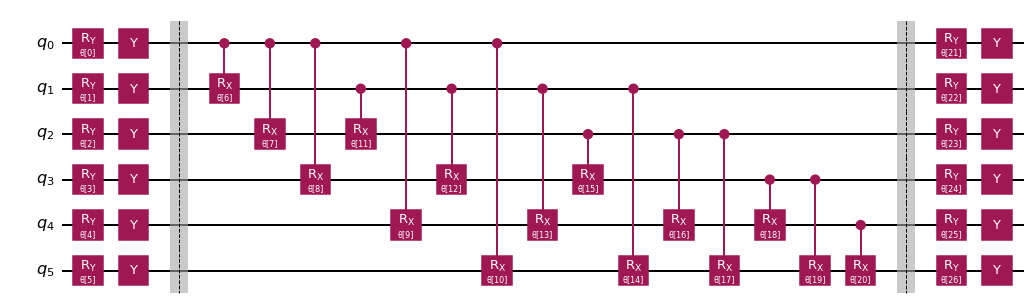

In [7]:
tl[7].decompose().draw(output='mpl',fold=1)

# EfficientSU2

In [8]:
ansatz_0a_su2 = ef_ansatz(H4q.num_qubits, 'ry',  "circular", 1)
ansatz_0b_su2 = ef_ansatz(H4q.num_qubits, 'rz',  'circular', 1)
ansatz_0c_su2 = ef_ansatz(H4q.num_qubits, ['ry','rz'], 'circular', 1)
ansatz_0d_su2 = ef_ansatz(H4q.num_qubits,['ry','y'], 'circular', 1)

ansatz_1a_su2 =  ef_ansatz(H4q.num_qubits, 'ry',  "full", 1)
ansatz_1b_su2 =  ef_ansatz(H4q.num_qubits, 'rz',  "full", 1)
ansatz_1c_su2 =  ef_ansatz(H4q.num_qubits, ['ry','rz'], "full", 1)
ansatz_1d_su2 =  ef_ansatz(H4q.num_qubits, ['ry','y'],  "full", 1)

Circuit ansatz with 12 parameters
Circuit ansatz with 12 parameters
Circuit ansatz with 24 parameters
Circuit ansatz with 12 parameters
Circuit ansatz with 12 parameters
Circuit ansatz with 12 parameters
Circuit ansatz with 24 parameters
Circuit ansatz with 12 parameters


In [9]:
effsu2 = [ansatz_0a_su2, ansatz_0b_su2, ansatz_0c_su2,ansatz_0d_su2, 
          ansatz_1a_su2, ansatz_1b_su2, ansatz_1c_su2, ansatz_1d_su2]
effsu2_names = ['ansatz_0a_su2', 'ansatz_0b_su2', 'ansatz_0c_su2','ansatz_0d_su2', 
          'ansatz_1a_su2', 'ansatz_1b_su2', 'ansatz_1c_su2', 'ansatz_1d_su2']

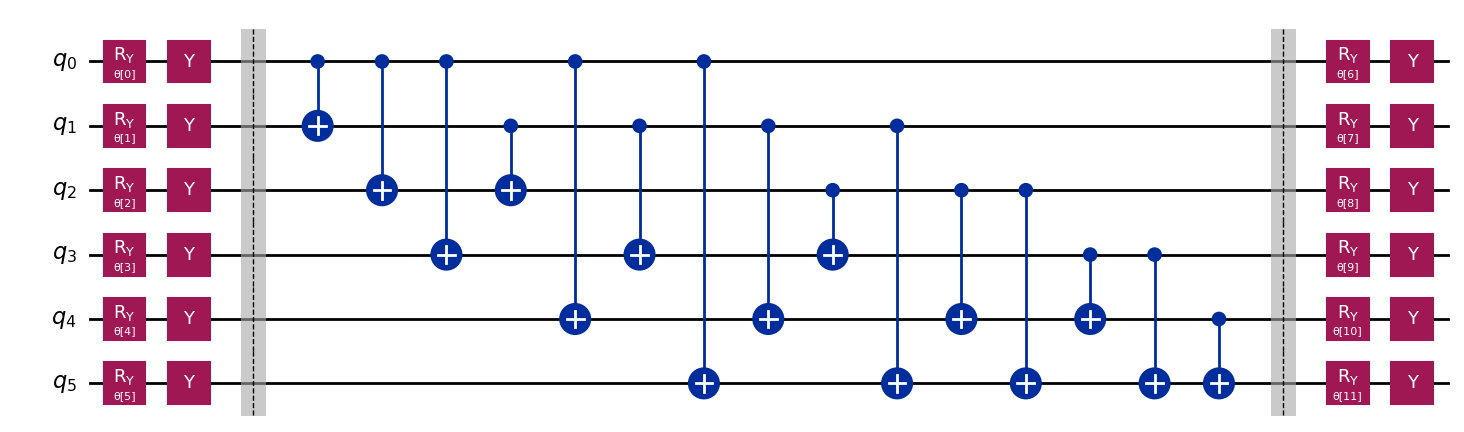

In [8]:
ansatz_1d_su2.decompose().draw(output='mpl',fold=1)

# QVE

## COBYLA: EffSU2

In [9]:
res_list = []
for i in range(len(effsu2)):
    print(f'At step {i} with {effsu2_names[i]}')
    qve = QVE(COBYLA, effsu2[i], H4q, iterations_=300)
    result = qve.run_qve_w_specified_optimizer()
    print(f'Length of this optimization {len(qve.values)} \n')
    res_list.append(pd.DataFrame({effsu2_names[i]:qve.values}))
    
df1 = pd.concat([res_list[i] for i in range(len(res_list))], axis = 1)
df1.to_csv('qve_l2_l0.2_effsu2_cobyla.csv')

At step 0 with ansatz_0a_su2
VQE result: 3.19141
Length of this optimization 184 

At step 1 with ansatz_0b_su2
VQE result: 3.14980
Length of this optimization 73 

At step 2 with ansatz_0c_su2
VQE result: 3.15801
Length of this optimization 300 

At step 3 with ansatz_0d_su2
VQE result: 3.15977
Length of this optimization 202 

At step 4 with ansatz_1a_su2
VQE result: 3.15918
Length of this optimization 170 

At step 5 with ansatz_1b_su2
VQE result: 3.14980
Length of this optimization 73 

At step 6 with ansatz_1c_su2
VQE result: 3.16211
Length of this optimization 300 

At step 7 with ansatz_1d_su2
VQE result: 3.15664
Length of this optimization 154 



In [10]:
df1

,ansatz_0a_su2,ansatz_0b_su2,ansatz_0c_su2,ansatz_0d_su2,ansatz_1a_su2,ansatz_1b_su2,ansatz_1c_su2,ansatz_1d_su2
0,6.085352,3.149805,6.043945,5.924805,6.085742,3.149805,6.039062,6.073438
1,6.067578,3.149805,6.103125,5.408789,6.064258,3.149805,5.516406,5.428320
2,6.344141,3.149805,6.130273,5.346094,5.991992,3.149805,5.634375,5.500195
3,6.026367,3.149805,5.901953,5.582813,5.846875,3.149805,5.514063,5.566797
4,6.416211,3.149805,5.952734,5.291211,5.931836,3.149805,5.431445,5.416211
...,...,...,...,...,...,...,...,...
295,NaN,NaN,3.158594,NaN,NaN,NaN,3.162109,NaN
296,NaN,NaN,3.158008,NaN,NaN,NaN,3.162109,NaN
297,NaN,NaN,3.159375,NaN,NaN,NaN,3.162109,NaN
298,NaN,NaN,3.158008,NaN,NaN,NaN,3.162109,NaN


## COBYLA: TwoLocal

In [11]:
res_list = []
for i in range(len(tl)):
    print(f'At step {i} with {tl_names[i]}')
    qve = QVE(COBYLA, tl[i], H4q, iterations_=250)
    result = qve.run_qve_w_specified_optimizer()
    print(f'Length of this optimization {len(qve.values)} \n')
    res_list.append(pd.DataFrame({tl_names[i]:qve.values}))
    
df2 = pd.concat([res_list[i] for i in range(len(res_list))], axis = 1)
df2.to_csv('qve_l2_l0.2_twolocal_cobyla.csv')

At step 0 with ansatz_0a
VQE result: 3.14629
Length of this optimization 209 

At step 1 with ansatz_0b
VQE result: 3.14980
Length of this optimization 109 

At step 2 with ansatz_0c
VQE result: 3.15762
Length of this optimization 250 

At step 3 with ansatz_0d
VQE result: 3.14629
Length of this optimization 209 

At step 4 with ansatz_1a
VQE result: 3.14785
Length of this optimization 250 

At step 5 with ansatz_1b
VQE result: 3.14980
Length of this optimization 163 

At step 6 with ansatz_1c
VQE result: 3.16289
Length of this optimization 250 

At step 7 with ansatz_1d
VQE result: 3.14785
Length of this optimization 250 



In [12]:
df2

,ansatz_0a,ansatz_0b,ansatz_0c,ansatz_0d,ansatz_1a,ansatz_1b,ansatz_1c,ansatz_1d
0,6.200391,3.149805,6.748438,6.200391,6.204883,3.149805,7.284766,6.204883
1,5.759570,3.149805,6.542969,5.759570,5.811328,3.149805,7.223438,5.811328
2,5.307813,3.149805,6.270117,5.307813,5.486523,3.149805,7.063672,5.486523
3,4.841992,3.149805,6.035547,4.841992,5.884375,3.149805,7.237695,5.884375
4,5.055664,3.149805,5.797461,5.055664,5.892773,3.149805,6.973633,5.892773
...,...,...,...,...,...,...,...,...
245,NaN,NaN,3.158594,NaN,3.148438,NaN,3.164844,3.148438
246,NaN,NaN,3.157617,NaN,3.148242,NaN,3.167578,3.148242
247,NaN,NaN,3.158008,NaN,3.148242,NaN,3.173633,3.148242
248,NaN,NaN,3.157813,NaN,3.147852,NaN,3.165625,3.147852


## SPSA

In [13]:
res_list = []
for i in range(len(effsu2)):
    print(f'At step {i} with {effsu2_names[i]}')
    qve = QVE(SPSA, effsu2[i], H4q, iterations_=250)
    result = qve.run_qve_w_specified_optimizer()
    res_list.append(pd.DataFrame({effsu2_names[i]:qve.values}))
    
df4 = pd.concat([res_list[i] for i in range(len(res_list))], axis = 1)
df4.to_csv('qve_l2_l0.2_effsu2_spsa.csv')

At step 0 with ansatz_0a_su2
VQE result: 3.15703
Length of this optimization 551 

At step 1 with ansatz_0b_su2
VQE result: 3.14980
Length of this optimization 551 

At step 2 with ansatz_0c_su2
VQE result: 3.16816
Length of this optimization 551 

At step 3 with ansatz_0d_su2
VQE result: 3.16641
Length of this optimization 551 

At step 4 with ansatz_1a_su2
VQE result: 3.15332
Length of this optimization 551 

At step 5 with ansatz_1b_su2
VQE result: 3.14980
Length of this optimization 551 

At step 6 with ansatz_1c_su2
VQE result: 3.15137
Length of this optimization 551 

At step 7 with ansatz_1d_su2
VQE result: 3.15137
Length of this optimization 551 



In [14]:
df4

,ansatz_0a_su2,ansatz_0b_su2,ansatz_0c_su2,ansatz_0d_su2,ansatz_1a_su2,ansatz_1b_su2,ansatz_1c_su2,ansatz_1d_su2
0,6.201172,3.149805,6.034375,5.961328,5.993555,3.149805,6.190820,6.047266
1,6.116211,3.150391,6.244531,6.109570,6.340430,3.150391,5.829102,6.253711
2,6.166992,3.150781,6.108789,5.861914,6.008594,3.150781,6.062500,6.623047
3,6.041016,3.148633,5.817773,5.929297,6.320898,3.148633,6.040234,5.597266
4,6.005859,3.147656,5.951563,6.107227,5.882812,3.147656,6.233008,6.004297
...,...,...,...,...,...,...,...,...
546,3.252148,3.149805,3.285547,3.312305,3.238867,3.149805,3.216602,3.219531
547,3.196094,3.150391,3.290820,3.235352,3.220313,3.150391,3.206445,3.191016
548,3.238672,3.149805,3.295508,3.300586,3.239453,3.149805,3.221484,3.227344
549,3.226367,3.150391,3.270703,3.257813,3.215234,3.150391,3.209375,3.217969


In [15]:
res_list = []
for i in range(len(tl)):
    print(f'At step {i} with {tl_names[i]}')
    qve = QVE(SPSA, tl[i], H4q, iterations_=250)
    result = qve.run_qve_w_specified_optimizer()
    res_list.append(pd.DataFrame({tl_names[i]:qve.values}))
    
df3 = pd.concat([res_list[i] for i in range(len(res_list))], axis = 1)
df3.to_csv('qve_l2_l0.2_twolocal_spsa.csv')


At step 0 with ansatz_0a
VQE result: 3.14941
Length of this optimization 551 

At step 1 with ansatz_0b
VQE result: 3.14980
Length of this optimization 551 

At step 2 with ansatz_0c
VQE result: 3.15645
Length of this optimization 551 

At step 3 with ansatz_0d
VQE result: 3.14941
Length of this optimization 551 

At step 4 with ansatz_1a
VQE result: 3.14980
Length of this optimization 551 

At step 5 with ansatz_1b
VQE result: 3.14980
Length of this optimization 551 

At step 6 with ansatz_1c
VQE result: 3.15605
Length of this optimization 551 

At step 7 with ansatz_1d
VQE result: 3.14980
Length of this optimization 551 



In [16]:
df3

,ansatz_0a,ansatz_0b,ansatz_0c,ansatz_0d,ansatz_1a,ansatz_1b,ansatz_1c,ansatz_1d
0,5.894727,3.149805,6.927734,5.894727,5.567383,3.149805,7.197852,5.567383
1,6.522070,3.150391,6.445312,6.522070,6.777148,3.150391,7.367578,6.777148
2,6.559570,3.150781,6.611914,6.559570,6.162695,3.150781,7.383594,6.162695
3,5.863477,3.148633,6.574805,5.863477,6.233789,3.148633,6.990039,6.233789
4,6.069141,3.147656,6.501172,6.069141,5.983398,3.147656,7.143555,5.983398
...,...,...,...,...,...,...,...,...
546,3.199609,3.149805,3.201758,3.199609,3.219531,3.149805,3.203516,3.219531
547,3.189258,3.150391,3.187500,3.189258,3.200391,3.150391,3.195703,3.200391
548,3.185352,3.149805,3.210352,3.185352,3.213281,3.149805,3.222656,3.213281
549,3.172656,3.150391,3.208594,3.172656,3.211328,3.150391,3.215039,3.211328
